<a href="https://colab.research.google.com/github/ninadcpa/dsc530/blob/main/EDA_Final_term_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis - Final Project

@Author - Ninad Patkhedkar  
Term - Winter 2020  
Bellevue University

Data Set is picked from - https://www.kaggle.com/mathurinache/world-happiness-report

LICENSE - CC0: Public Domain

With This dataset, I will perform EDA and try to find answers for qustions like

1.   Which countries are on extereme end of happiness spectrum?
2.   Is any specific region of world more happier than others?
3.   How much financial well being of country impacts happiness score?

4.   How badly corruption impacts happiness score?
5.   How Generosity and Freedom of choices matters?  

In [ ]:
from google.colab import drive
import sys
import os

# This code is to just use code checked out from github on google drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/Colab Notebooks/ThinkStats/ThinkStats2/code/')
os.chdir('/content/drive/MyDrive/Colab Notebooks/ThinkStats/ThinkStats2/code/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from __future__ import print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#pd.set_option("display.precision", 2)
missing_values = ["n/a", "na", "--",""]
df = pd.read_csv('2020.csv',na_values = missing_values)

In [ ]:
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


Overall dataset looks very clean. Lets verify if there are any missing values.

In [ ]:
# Total missing values for each feature
df.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

Dataset doesn't have any missing values. Hence no cleanup work is required.

In [ ]:
df.shape

(153, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

Extarcting 5 variables

---

GDP per capita  
Healthy Life Expectancy  
Social support  
Freedom to make life choices  
Generosity  
Corruption Perception

In [ ]:
df =  df.rename(columns={'Country name': 'Country', 
                         'Regional indicator': 'Region',
                         'Ladder score':'Happiness',
                         'Logged GDP per capita': 'GDP_Capita',
                         'Social support': 'Social_Support',
                         'Healthy life expectancy': 'Life_Expectancy',
                         'Freedom to make life choices': 'Freedom_Choice',
                         'Perceptions of corruption': 'Corruption'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     153 non-null    object 
 1   Region                                      153 non-null    object 
 2   Happiness                                   153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   GDP_Capita                                  153 non-null    float64
 7   Social_Support                              153 non-null    float64
 8   Life_Expectancy                             153 non-null    float64
 9   Freedom_Choice                              153 non-null    float64
 10  Generosity    

In [ ]:
columns = ['Country','Region','Happiness','GDP_Capita','Social_Support','Generosity','Life_Expectancy','Freedom_Choice','Corruption']
happy_df = df[columns]
happy_df.sample(5)

,Country,Region,Happiness,GDP_Capita,Social_Support,Generosity,Life_Expectancy,Freedom_Choice,Corruption
57,Ecuador,Latin America and Caribbean,5.9252,9.246058,0.836419,-0.127015,68.500038,0.859829,0.801215
114,Nigeria,Sub-Saharan Africa,4.7241,8.576625,0.737217,0.033746,49.861908,0.759578,0.861874
58,Portugal,Western Europe,5.9109,10.263742,0.886591,-0.220714,72.402023,0.888748,0.892630
11,Australia,North America and ANZ,7.2228,10.720596,0.944855,0.190460,73.604538,0.915432,0.415169
124,Palestinian Territories,Middle East and North Africa,4.5528,8.389223,0.825296,-0.162079,62.250000,0.645792,0.824200


In [ ]:
happy_df.describe()

,Happiness,GDP_Capita,Social_Support,Generosity,Life_Expectancy,Freedom_Choice,Corruption
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,9.295706,0.808721,-0.014568,64.445529,0.783360,0.733120
std,1.11227,1.201588,0.121453,0.151809,7.057848,0.117786,0.175172
min,2.56690,6.492642,0.319460,-0.300907,45.200001,0.396573,0.109784
25%,4.72410,8.350645,0.737217,-0.127015,58.961712,0.714839,0.683019
50%,5.51500,9.456313,0.829204,-0.033665,66.305145,0.799805,0.783122
75%,6.22850,10.265124,0.906747,0.085429,69.289192,0.877709,0.849151
max,7.80870,11.450681,0.974670,0.560664,76.804581,0.974998,0.935585


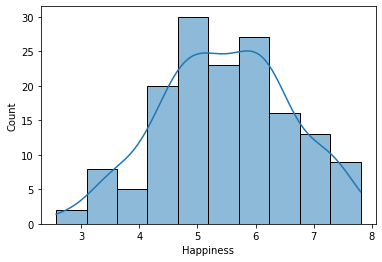

In [ ]:
sns.histplot(happy_df['Happiness'],kde=True)

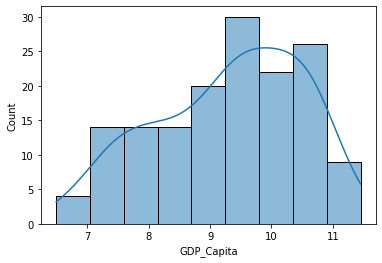

In [ ]:
sns.histplot(happy_df['GDP_Capita'],kde=True)

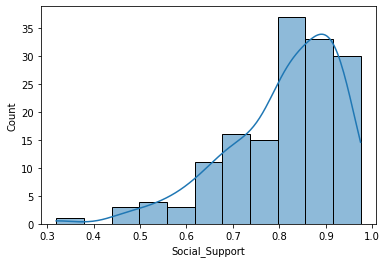

In [ ]:
sns.histplot(happy_df['Social_Support'],kde=True)

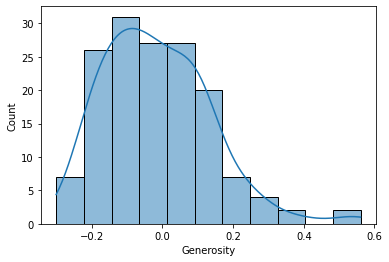

In [ ]:
sns.histplot(happy_df['Generosity'],kde=True)

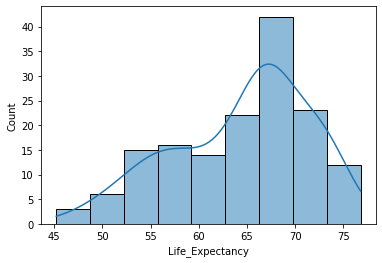

In [ ]:
sns.histplot(happy_df['Life_Expectancy'],kde=True)

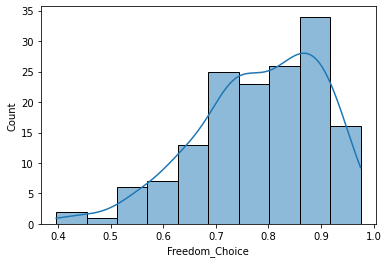

In [ ]:
sns.histplot(happy_df['Freedom_Choice'],kde=True)

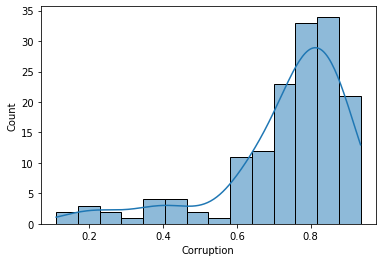

In [ ]:
sns.histplot(happy_df['Corruption'],kde=True)

**Find outlier**

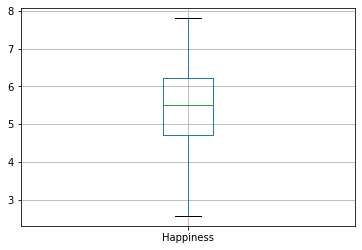

In [ ]:
happy_df.boxplot(column=['Happiness'])

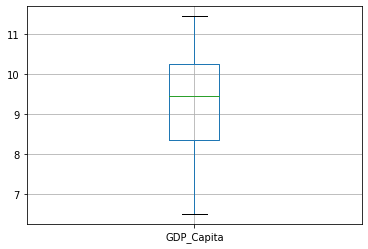

In [ ]:
happy_df.boxplot(column=['GDP_Capita'])

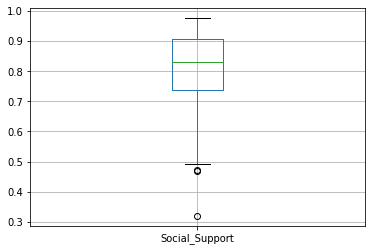

In [ ]:
happy_df.boxplot(column=['Social_Support'])

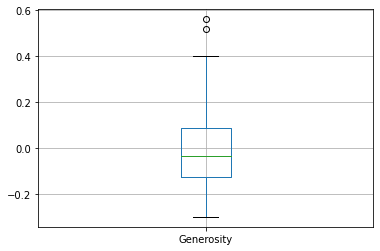

In [ ]:
happy_df.boxplot(column=['Generosity'])

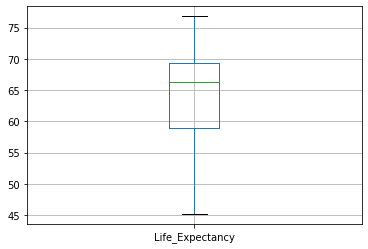

In [ ]:
happy_df.boxplot(column=['Life_Expectancy'])

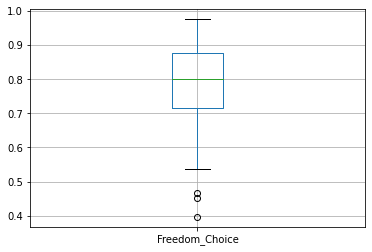

In [ ]:
happy_df.boxplot(column=['Freedom_Choice'])

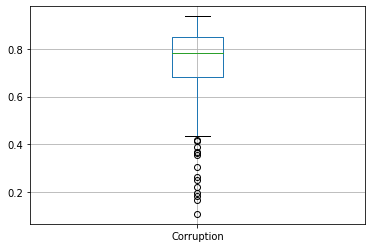

In [ ]:
happy_df.boxplot(column=['Corruption'])

Box plot shows fields like Perception of Corruption, Freedom to make Life Choices and Social Support fields have some outliers.

Generally decision to keep or remove outliers is based on domain knowledge. Here in this case I will use z-score method to remove outliers.

We find the z-score for each of the data point in the dataset and if the z-score is greater than 3 than we can classify that point as an outlier. Any point outside of 3 standard deviations would be an outlier.

In [ ]:
from scipy import stats
z_corruption=np.abs(stats.zscore(happy_df.Corruption))
happy_df = happy_df[z_corruption <3]
z_freedom=np.abs(stats.zscore(happy_df.Freedom_Choice))
happy_df = happy_df[z_freedom <3]
z_social_support=np.abs(stats.zscore(happy_df.Social_Support))
happy_df = happy_df[z_social_support <3]
z_social_generosity=np.abs(stats.zscore(happy_df.Generosity))
happy_df = happy_df[z_social_generosity <3]

In [ ]:
happy_df.shape

(145, 9)

In [ ]:
happy_df.describe()

,Happiness,GDP_Capita,Social_Support,Generosity,Life_Expectancy,Freedom_Choice,Corruption
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,5.493970,9.308247,0.813726,-0.023360,64.545184,0.781539,0.745953
std,1.049121,1.170490,0.110526,0.140535,6.842001,0.112679,0.150189
min,2.816600,6.492642,0.468671,-0.300907,48.003624,0.451314,0.221139
25%,4.750600,8.389223,0.737502,-0.130642,59.105427,0.714839,0.690718
50%,5.535500,9.500369,0.831075,-0.042309,66.404343,0.795294,0.783237
75%,6.227300,10.263742,0.903151,0.085429,69.002548,0.870603,0.847965
max,7.559900,11.450681,0.974670,0.400535,76.771706,0.974998,0.935585


To find countries on extereme end of happiness score, I will filter out countries having happiness less than 1st Quartile (4.75) and countries having happines more that 3rd Quartile (6.22)

In [ ]:
low_happy_df = happy_df[happy_df['Happiness'] < 4.75].sort_values('Happiness')
low_happy_df.head(10)

,Country,Region,Happiness,GDP_Capita,Social_Support,Generosity,Life_Expectancy,Freedom_Choice,Corruption
151,South Sudan,Sub-Saharan Africa,2.8166,7.425360,0.553707,0.016519,51.000000,0.451314,0.763417
150,Zimbabwe,Sub-Saharan Africa,3.2992,7.865712,0.763093,-0.072064,55.617260,0.711458,0.810237
147,Tanzania,Sub-Saharan Africa,3.4762,7.967665,0.688933,0.109669,57.496075,0.821540,0.619799
146,Botswana,Sub-Saharan Africa,3.4789,9.711204,0.779122,-0.250394,58.924454,0.821328,0.777931
145,Yemen,Middle East and North Africa,3.5274,7.759683,0.817981,-0.157735,56.727283,0.599920,0.800288
144,Malawi,Sub-Saharan Africa,3.5380,7.062226,0.544007,0.021433,57.592888,0.803223,0.731701
143,India,South Asia,3.5733,8.849824,0.592201,0.057552,60.215187,0.881445,0.772043
142,Lesotho,Sub-Saharan Africa,3.6528,7.960488,0.780496,-0.145732,48.003624,0.738126,0.857392
141,Haiti,Latin America and Caribbean,3.7208,7.411329,0.593248,0.400535,55.598625,0.537825,0.684767
140,Zambia,Sub-Saharan Africa,3.7594,8.224720,0.698824,0.078037,55.299377,0.806500,0.801290


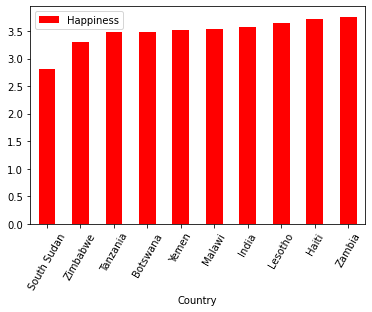

In [ ]:
low_happy_df.head(10).plot.bar(x='Country', y='Happiness', rot=60, color='red')

In [ ]:
high_happy_df = happy_df[happy_df['Happiness'] > 6.22].sort_values('Happiness',ascending=False)
high_happy_df.head(10)

,Country,Region,Happiness,GDP_Capita,Social_Support,Generosity,Life_Expectancy,Freedom_Choice,Corruption
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,0.105911,74.102448,0.921337,0.303728
3,Iceland,Western Europe,7.5045,10.772559,0.974670,0.246944,73.000000,0.948892,0.711710
4,Norway,Western Europe,7.4880,11.087804,0.952487,0.134533,73.200783,0.955750,0.263218
5,Netherlands,Western Europe,7.4489,10.812712,0.939139,0.207612,72.300919,0.908548,0.364717
6,Sweden,Western Europe,7.3535,10.758794,0.926311,0.111615,72.600769,0.939144,0.250880
7,New Zealand,North America and ANZ,7.2996,10.500943,0.949119,0.191598,73.202629,0.936217,0.221139
8,Austria,Western Europe,7.2942,10.742824,0.928046,0.085429,73.002502,0.899989,0.499955
9,Luxembourg,Western Europe,7.2375,11.450681,0.906912,-0.004621,72.599998,0.905636,0.367084
10,Canada,North America and ANZ,7.2321,10.692369,0.927177,0.124771,73.601601,0.933913,0.390843
11,Australia,North America and ANZ,7.2228,10.720596,0.944855,0.190460,73.604538,0.915432,0.415169


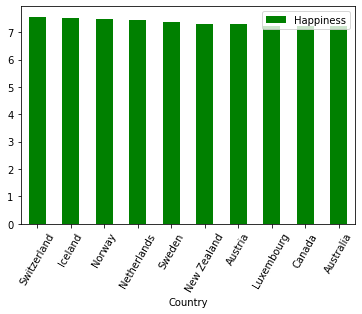

In [ ]:
high_happy_df.head(10).plot.bar(x='Country', y='Happiness', rot=60, color='green')

One interesting observation from above analysis is, countries from Western Europe occurs much frequenst in high happiness score. Is Western Europe happies region of the world?

Lets see how each region fares.

First we will find out how many contires from each region particiapted in survey?


In [ ]:
happy_df['Region'].value_counts()

Sub-Saharan Africa                    37
Latin America and Caribbean           21
Western Europe                        19
Central and Eastern Europe            17
Middle East and North Africa          17
Commonwealth of Independent States    12
Southeast Asia                         6
South Asia                             6
East Asia                              6
North America and ANZ                  4
Name: Region, dtype: int64

How many counties from each region scored higher happiness score than 3rd quartile?

In [ ]:
high_happy_df['Region'].value_counts()

Western Europe                        15
Latin America and Caribbean            8
Central and Eastern Europe             4
North America and ANZ                  4
Middle East and North Africa           4
Commonwealth of Independent States     1
East Asia                              1
Name: Region, dtype: int64

Lets calculate the percentage of of countries scored higher per region.

In [ ]:
percentage_df = ((high_happy_df['Region'].value_counts()/happy_df['Region'].value_counts())*100).to_frame().reset_index()
percentage_df.columns = ['Region', 'Percentage']
percentage_df = percentage_df.sort_values('Percentage',ascending=False)

In [ ]:
percentage_df.head(10)

,Region,Percentage
5,North America and ANZ,100.000000
9,Western Europe,78.947368
3,Latin America and Caribbean,33.333333
0,Central and Eastern Europe,23.529412
4,Middle East and North Africa,17.647059
2,East Asia,16.666667
1,Commonwealth of Independent States,8.333333
6,South Asia,NaN
7,Southeast Asia,NaN
8,Sub-Saharan Africa,NaN


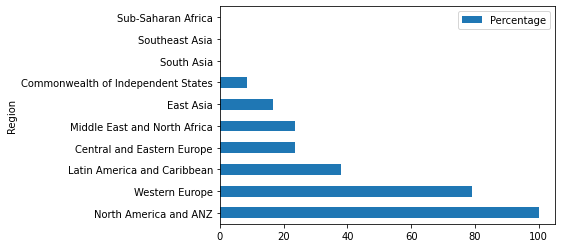

In [ ]:
ax = percentage_df.plot.barh(x='Region', y='Percentage')

Contary to belief, Western Europe scored around 79% much lower than North America-Australia-New Zealand which score 100%.

However observation could be biased as both regions have different sampling. Western Europe region had 21 countries out of which 15 scored high. North America and ANZ had only 4 counties and all of them scored high.

In [ ]:
import thinkstats2
import thinkplot

# Rounding Life Expectancy to integer and calculating pmf
low_pmf = thinkstats2.Pmf(low_happy_df.Life_Expectancy.round(0).astype(int), label='low')
high_pmf = thinkstats2.Pmf(high_happy_df.Life_Expectancy.round(0).astype(int), label='high')

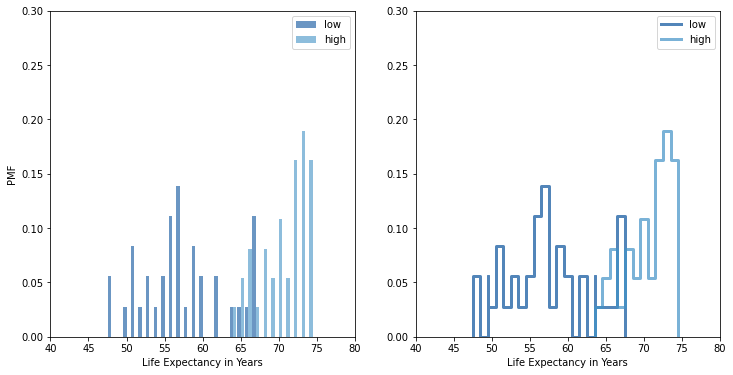

In [ ]:
width=0.45

# In whole dataset min/max values of life expectancy are 45.20/76.80 respectively
# Hence choosing axis values between 40 to 80
axis = [40, 80, 0, 0.3]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(low_pmf, align='right', width=width)
thinkplot.Hist(high_pmf, align='left', width=width)
thinkplot.Config(xlabel='Life Expectancy in Years', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([low_pmf, high_pmf])
thinkplot.Config(xlabel='Life Expectancy in Years', axis=axis)

Looking at PMF, it seems that Life Expectancy is higher in countries with higher happiness score compared to lower scored happiness countries.

**CDF** - Cumulative distribution functions



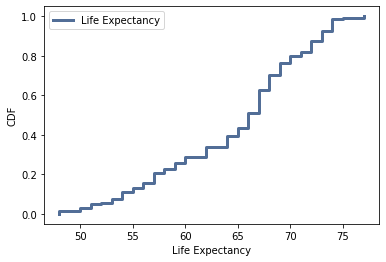

In [ ]:
cdf = thinkstats2.Cdf(happy_df.Life_Expectancy.round(0).astype(int), label='Life Expectancy')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Life Expectancy', ylabel='CDF', loc='upper left')

Only 5% of the countries have Life Expectancy below 50 years. 50% of the countries have Life Expectancy around 65 years.

**Corelation Analysis**

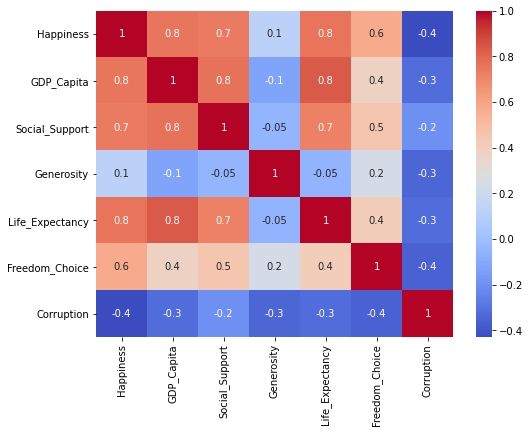

In [ ]:
columns_of_interest = ['Happiness','GDP_Capita','Social_Support','Generosity','Life_Expectancy','Freedom_Choice','Corruption']

plt.figure(figsize=(8,6))
#sns.heatmap(df.corr(), annot = True, fmt='.1g', cmap= 'coolwarm')
sns.heatmap(happy_df[columns_of_interest].corr(), annot = True, fmt='.1g', cmap= 'coolwarm')

Looking at HeatMap, I can say that there is strong correlation between Happiness score and GDP per capita of country.

Lets see scatterplt

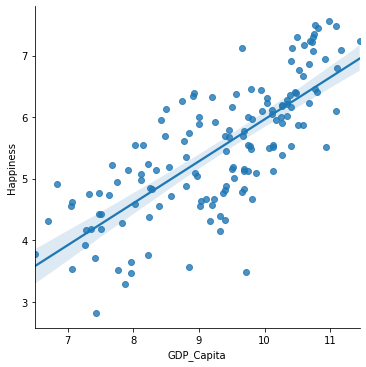

In [ ]:
sns.lmplot(data=happy_df, x="GDP_Capita", y="Happiness")

In [ ]:
happy_df.Happiness.cov(happy_df.GDP_Capita)

0.9319570248016631

In [ ]:
happy_df.Happiness.corr(happy_df.GDP_Capita)

0.7589310211178693

Lets check negative impact of **Corruption**

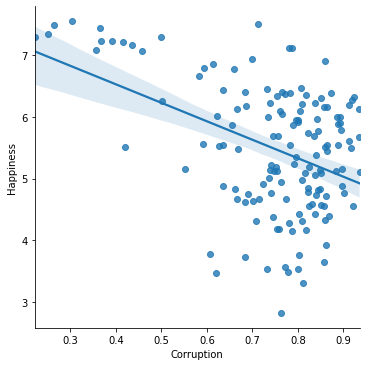

In [ ]:
sns.lmplot(data=happy_df, x="Corruption", y="Happiness")

In [ ]:
happy_df.Happiness.cov(happy_df.Corruption)

-0.06767088434577255

In [ ]:
happy_df.Happiness.corr(happy_df.Corruption)

-0.42947582790836225

Happiness score has weak negative relationship with perception of corruption.

Though its weak correlation, its still linear. Its not non-linear correlation.

To my surprise, corruption doesn't seems to have strong impact on happiness. I believe this could be due to dataset reflects perception of corruption at high level where day-to-day life of layman doesn't get impacted. Low level corruption in developing countries affects day-to-day life badly.

**Hypothesis Testing**  

In general, Null hypothesis represent absence of any effect on dependeant variable or say no relationship between variable and outcome. Alternative hypothesis is always to negate null hypotheisis means presence of effect.

*** H0 - Null Hypothesis***: The average Generosity in highly happy countries is same as other countries.  
*** H1 - Alternate Hypothesis***: The average Generosity in highly happy countries is not same as in other countries.

Considering confidence level 95% i.e. alpha=0.05



In [ ]:
high_happy_countries_generosity_mean = high_happy_df.Generosity.mean()
high_happy_countries_generosity_mean

0.03249184451351351

In [ ]:
population_generosity_mean=happy_df.Generosity.mean()
population_generosity_mean

-0.023360451206896546

In [ ]:
from scipy.stats import ttest_1samp
ttest_1samp(high_happy_df.Generosity, population_generosity_mean)


Ttest_1sampResult(statistic=2.348220367947006, pvalue=0.024475279378202184)

p-value is 0.02 which less than 0.05. It means we have to reject Null hypothesis. It means average Generosity in highly happy countries is not same as other countries.

***Does Social Support and Freedom to Make Choices really matters?***

First we will consider only one variable i.e. Social Support. Let's see how Social support matters for overall happiness of country.

In [ ]:
import statsmodels.api as sm
import pandas.util.testing as tm

X = happy_df[['Social_Support']] # here we have 2 variables for multiple regression. 
Y = happy_df['Happiness']
model = sm.OLS(Y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Happiness   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              9067.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):                   2.62e-133
Time:                        04:06:33   Log-Likelihood:                         -156.74
No. Observations:                 147   AIC:                                      315.5
Df Residuals:                     146   BIC:                                      318.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Social_Support     6.7474      0.071     95.222      0.000       6.607       6.887
==============================================================================
Omnibus:                        1.959   Durbin-Watson:                   0.910
Prob(Omnibus):                  0.375   Jarque-Bera (JB):                1.598
Skew:                          -0.246   Prob(JB):                        0.450
Kurtosis:                       3.139   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.pvalues

Social_Support    2.617932e-133
dtype: float64

P-value is very less than 0.05. It means Social support has significant effect on happiness score of country.

Lets consider another variable 'Freedom to make Life Choices' and see how it affects overall happiness score.

In [ ]:
X = happy_df[['Social_Support','Freedom_Choice']] # here we have 2 variables for multiple regression. 
Y = happy_df['Happiness']

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Happiness   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              5018.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):                   1.35e-134
Time:                        03:42:43   Log-Likelihood:                         -148.88
No. Observations:                 147   AIC:                                      301.8
Df Residuals:                     145   BIC:                                      307.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Social_Support     4.8782      0.467     10.441      0.000       3.955       5.802
Freedom_Choice     1.9604      0.485      4.043      0.000       1.002       2.919
==============================================================================
Omnibus:                        3.748   Durbin-Watson:                   0.718
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                3.551
Skew:                          -0.381   Prob(JB):                        0.169
Kurtosis:                       3.008   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p-value is still less than 0.05 means both variables have significant effect on happiness score.

Coeffiecnt of Social support reduced from 6.74 to 4.87. Coeffient of Freedom to make Life Choices is 1.9. So in nutshell part of social support effect is accounted by freedom.

R-square value didn't increase much. It means overall both variables together doesn't have much effect on happiness score.